In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn.cluster
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## 2.4 Analysing your results!
You are often encouraged to explain the main characteristics that your clusters have. This is called the Characterizing Clusters step. Thus, follow the next steps to do it:
* Select 2-3 variables you think are relevant to identify the cluster of the customer. For example, CustGender, Number of transactions, etc.
* Most of your selected variables will be numerical (continuous or discrete), then categorise them into four categories.
* With the selected variables, perform pivot tables. On the horizontal axis, you will have the clusters, and on the vertical axis, you will have the categories of each variable. Notice that you have to do one pivot table per variable.
* Calculate the percentage by column for each pivot table. The sum of each row (cluster) must be 100. The sample example for clustering with K = 4 and Gender variable:

Let's use the dataset we obtained after feature engineering:

In [61]:
df = pd.read_pickle('customer_engineered.pkl')

Now we add a new column to the original database that trasform the gender of a customer in a 0-1 variable

In [62]:
df['Gender_Cust']=np.where(df['Most common gender']=='F',1,0)

Now we select 3 variable that are relevant to identify the cluster of the customer.

In [63]:
relevant_df = df[['Gender_Cust','CustomerAge','AVG Balance']]

Let's standardize our dataset.Standardization prevents variables with larger scales from dominating how clusters are defined.\
It allows all variables tobe considered by the algorithm with equal importance.

In [64]:
relevant_df = StandardScaler().fit_transform(relevant_df)
feat_cols = ['Gender_Cust','CustomerAge','AVG Balance']
relevant_df = pd.DataFrame(relevant_df,columns=feat_cols)

To obtain the optimal number of clusters into which to divide our dataset we sample and use KElbowVisualizer from yellowbrick.cluster.\
If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.\
In the following, the KElbowVisualizer fits the model for a range of K values from 3 to 50, which is set by the parameter k=(3,50).\
When the model is fit with 13 clusters we can see an "elbow" in the graph.

In [13]:
relevant_df_sample = relevant_df.sample(20000)

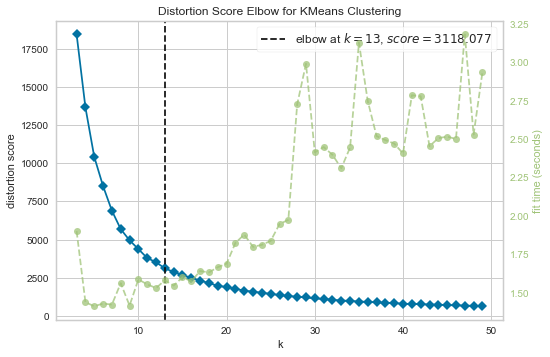

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,50))
visualizer.fit(relevant_df_sample)        # Fit the data to the visualizer
visualizer.show()  

In [65]:
model = KMeans(n_clusters=13,init='k-means++')

Let's plot our data to have a visual idea.

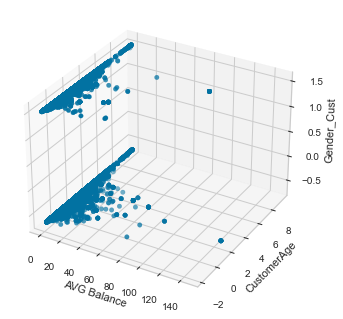

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = relevant_df['AVG Balance']
y = relevant_df['CustomerAge']
z = relevant_df['Gender_Cust']

# Plot the values
ax.scatter(x, y, z, c = 'b', marker='o')
ax.set_xlabel('AVG Balance')
ax.set_ylabel('CustomerAge')
ax.set_zlabel('Gender_Cust')

plt.show()

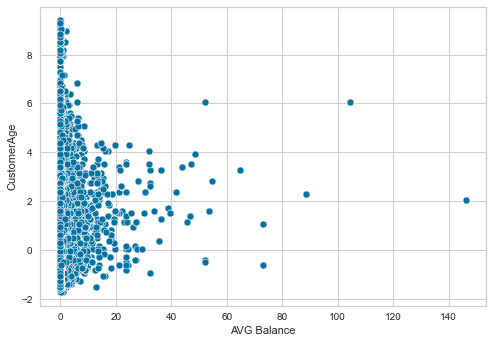

In [18]:
sns.scatterplot(x=relevant_df['AVG Balance'],y=relevant_df['CustomerAge'])
plt.show()

Time for Clustering

In [7]:
relevant_df['cluster'] = model.fit_predict(relevant_df)

In [8]:
relevant_df

,Gender_Cust,CustomerAge,AVG Balance,cluster
0,1.518979,-0.837662,-0.037537,5
1,-0.658337,-1.060243,-0.103847,0
2,1.518979,-0.726372,-0.007302,5
3,1.518979,-0.503791,-0.134001,5
4,-0.658337,2.167182,-0.023906,4
...,...,...,...,...
839076,-0.658337,-0.615081,0.034611,0
839077,-0.658337,-1.282825,-0.012453,0
839078,-0.658337,-0.948953,-0.127561,0
839079,-0.658337,-1.060243,-0.089740,0


<AxesSubplot:xlabel='AVG Balance', ylabel='CustomerAge'>

c:\Users\Angelo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


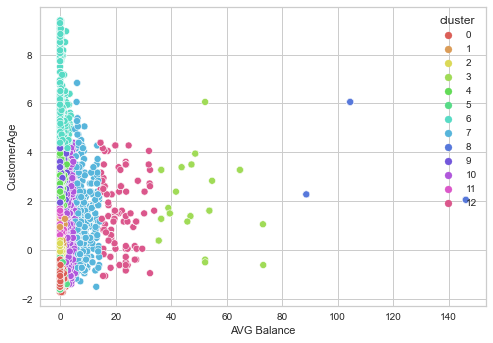

In [9]:
unique_values = len(relevant_df.cluster.unique())

sns.scatterplot(x=relevant_df['AVG Balance'], 
                y=relevant_df['CustomerAge'],
                palette=sns.color_palette('hls', unique_values),
               hue=relevant_df.cluster)

Let's visualize now the clustering in 3d

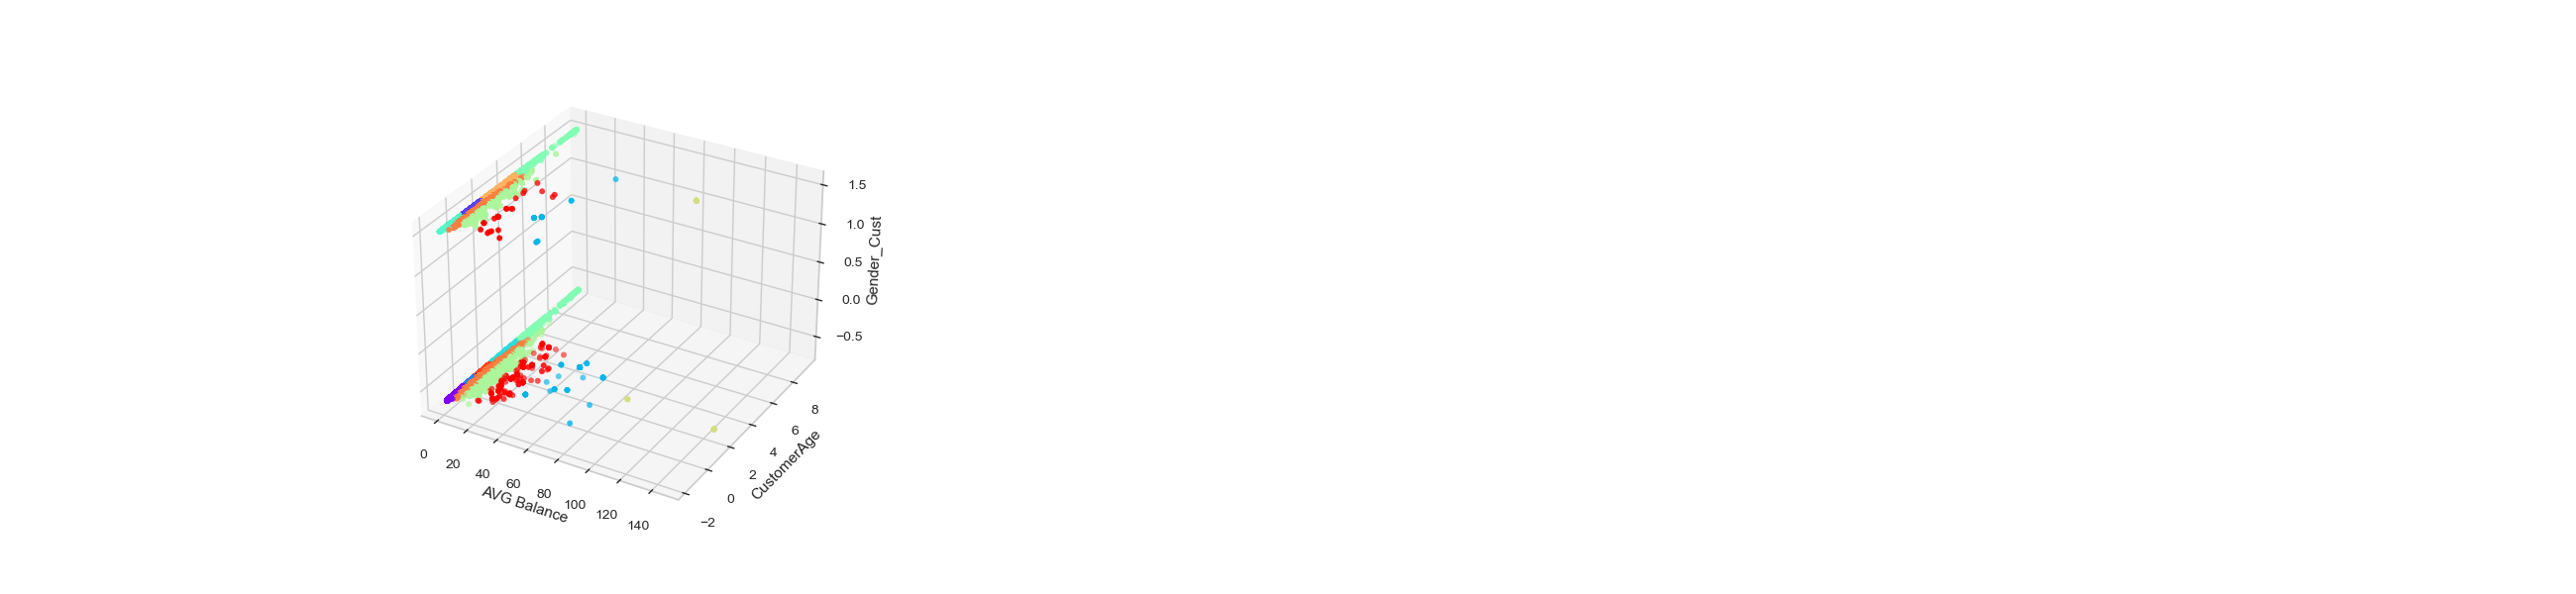

In [11]:
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
colors = cm.rainbow(np.linspace(0, 1, len(relevant_df.cluster.unique())))
relevant_df['c'] = relevant_df.cluster.map({i:colors[i] for i in range(0,13)})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(relevant_df['AVG Balance'], relevant_df['CustomerAge'], relevant_df['Gender_Cust'], c=relevant_df.c, s=15)
ax.set_xlabel('AVG Balance')
ax.set_ylabel('CustomerAge')
ax.set_zlabel('Gender_Cust')
plt.show()

Let's plot the centroids in 3d

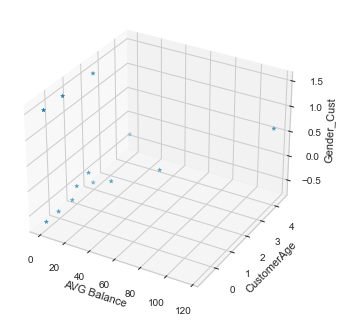

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = model.cluster_centers_[:,2]
y = model.cluster_centers_[:,1]
z = model.cluster_centers_[:,0]

# Plot the values
ax.scatter(x, y, z, c = 'b', marker='*')
ax.set_xlabel('AVG Balance')
ax.set_ylabel('CustomerAge')
ax.set_zlabel('Gender_Cust')

plt.show()

In [12]:
relevant_df.drop(columns='c',inplace=True)

In [14]:
relevant_df.to_pickle('relevant_df.pkl')

In [23]:
relevant_df = pd.read_pickle('relevant_df.pkl')

In [24]:
#to have an idea how big is every cluster
relevant_df.groupby('cluster').count()

,Gender_Cust,CustomerAge,AVG Balance
cluster,,,
0,253038,253038,253038
1,65505,65505,65505
2,205018,205018,205018
3,84,84,84
4,29147,29147,29147
5,166629,166629,166629
6,4827,4827,4827
7,1353,1353,1353
8,26,26,26


Now we can add the cluster column created to the starting dataset, since the starting dataset is not standardized.

In [33]:
df['cluster']=relevant_df['cluster']

### 5.
Interpret the results for each pivot table.

As requested we categorize every variable in 4 categories.\
We have slittled 'CustomerAge' into 4 categories:
* Young: customer with an age between 0 and 20
* Adult: customer with an age between 20 and 35
* Old: customer with an age between 35 and 55
* Reired: customer with an age between 55 and the maximum value


In [44]:
df['Age_Category'] = pd.cut(df['CustomerAge'],bins=[-1,20,35,55,123],labels=['Young','Adult','Old','Retired'])
table = df.pivot_table(index='cluster',columns = 'Age_Category',aggfunc='count',fill_value=0)['CustomerAge']
round(table.div(table.sum(axis=1), axis=0)*100,2)

Age_Category,Young,Adult,Old,Retired
cluster,,,,
0,0.0,100.00,0.00,0.00
1,0.0,0.00,100.00,0.00
2,0.0,17.53,82.47,0.00
3,0.0,3.57,34.52,61.90
4,0.0,0.00,22.11,77.89
5,0.0,85.76,14.24,0.00
6,0.0,0.00,0.00,100.00
7,0.0,14.19,62.97,22.84
8,0.0,0.00,0.00,100.00


As we can see the clustering make a good partition of the variable 'CustomerAge'. The cluster 0, 1, 6, 8 and 11 contain transactions relating only to a certain category.\
This tells us that the algorithm was able to create a partition between objects that have similar characteristics, and thus minimise the distance correctly\
Also the other clusters always contain more of one category than the others, which means that even here you can get a good partition.

We have slittled 'AVG Balance' into 4 categories:
* Basic: customer with an average balance between 0 and 1000
* Platinum	: customer with an average balance between 1000 and 10000
* Silver: customer with an average balance between 10000 and 100000
* Gold: customer with an average balance between 100000 and the maximum value

In [41]:
df['Balance_type'] = pd.cut(df['AVG Balance'],bins=[-1,1000,10000,100000,1380426],labels=['Basic','Platinum','Silver','Gold'])
table = df.pivot_table(index='cluster',columns = 'Balance_type',aggfunc='count',fill_value=0)['AVG Balance']
round(table.div(table.sum(axis=1), axis=0)*100,2)

Balance_type,Basic,Platinum,Silver,Gold
cluster,,,,
0,89.83,9.88,0.30,0.00
1,69.71,28.30,1.99,0.00
2,81.88,17.26,0.86,0.00
3,0.00,0.00,0.00,100.00
4,62.60,32.66,4.75,0.00
5,84.93,14.60,0.47,0.00
6,60.33,33.29,6.38,0.00
7,0.00,0.00,81.45,18.55
8,0.00,0.00,0.00,100.00


We can say exactly the same comment above.

We have slittled 'Gender_Cust' into 2 categories just considering 'Most common gender':
* Female
* Male

In [52]:
table = df.pivot_table(index='cluster',columns = 'Most common gender',aggfunc='count',fill_value=0)['Gender_Cust']
round(table.div(table.sum(axis=1), axis=0)*100,2)


Most common gender,F,M
cluster,,
0,0.00,100.00
1,100.00,0.00
2,0.00,100.00
3,20.24,79.76
4,0.00,100.00
5,100.00,0.00
6,29.25,70.75
7,22.91,77.09
8,57.69,42.31


We can say exactly the same comment above.

### 6.
Use any known metrics to estimate clustering algorithm performance (how good are the clusters you found?).

c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


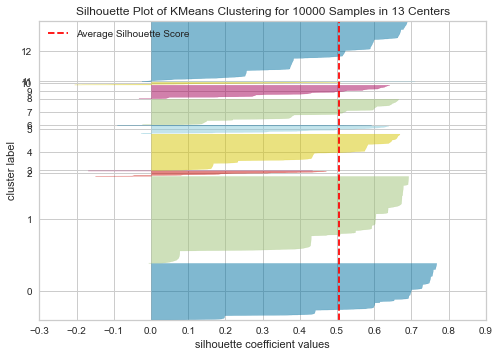

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 10000 Samples in 13 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [71]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
relevant_df_sample = relevant_df.sample(10000)
visualizer.fit(relevant_df_sample)        # Fit the data to the visualizer
visualizer.show()       

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). \
The value of the silhouette ranges between [1, -1], where a high value indicates that the object is well matched to its own cluster and\
poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate.\
Silhouette is a measure of how a clustering algorithm has performed. After computing the silhouette coefficient of each point in the dataset,\
plot it to get a visual representation of how well the dataset is clustered into k clusters. The silhouette plot displays a measure of how\
close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like the number\
of clusters visually. This measure has a range of [-1, 1].\
Since in this case the silhouette coefficient value is 0.5 approximately we can say that A reasonable structure has been found.